In [1]:
import cv2 as cv

In [3]:
import os
import sys

import random
import warnings
import time
import pprint as pp
from keras import layers
from keras import models
from time import strftime, gmtime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython import get_ipython

ip = get_ipython()

if ip == None:
    print('Python Script from notebook is running.')
    plt.switch_backend('agg')
else:
    print('Notebook is running.')

import os

from os import walk
import copy

#scratch_dir = '/scratch/gilbreth/azehady/'
scratch_dir = '/home/azehady/projects/'
project_dir = 'automatic_fossil_image_detection/' 

os.chdir(scratch_dir + project_dir)

path = scratch_dir + project_dir + 'datapack_images/Global/Foram_TSCLite_Images'

file_names = None
for (dirpath, dirnames, fnames) in walk(path):
    file_names = fnames

single_image_file = []
multiple_image_file = []
genus_single = []
species_single = []
genus_multiple = []
species_multiple = []

for f in file_names:
    forig = copy.copy(f)
    if ' ' in f:
        f = f.split(' ')
    elif '_' in f:
        f = f.split('_')
    if 'tiny' in forig and len(f) != 2:
        #print('single = ' + str(f))
        single_image_file.append(forig)
        genus_single.append(f[0])
        species_single.append(f[1])
    else:
        #print('multi = ' + str(f))
        multiple_image_file.append(forig)
        genus_multiple.append(f[0])
        fm = f[1].split('.')[0]
        species_multiple.append(fm)

        
        
'''

print(genus_single)
print(species_single)
print('')
print(genus_multiple)
print(species_multiple)

'''


for i, f in enumerate(single_image_file):
    s = str(genus_single[i]) + ', ' + str(f)
    #print(s)
    
print(len(genus_single))
print(genus_multiple)


# 79 different classes
cls = genus_single
file_names = single_image_file
multi_cls = {}
final_cls = {}
k = 0
for j, cl in enumerate(cls):
    if cl in multi_cls.keys():
        multi_cls[cl].append(j)
    else:
        a = [j]
        multi_cls[cl] = a
        final_cls[cl] = k
        k += 1
    
print(multi_cls)
print("")
print(final_cls)
print("")

classes = {}
class_names = {}
for k in multi_cls.keys():
    clss = multi_cls[k]
    for c in clss:
        classes[c] = final_cls[k]
        class_names[c] = k
     
print(classes)
print("")
print(class_names)

uniq_cls = uniq_genus = list(multi_cls.keys())

print("")
print(uniq_cls)
        
#print(cls)
#print(file_names)

# Link: https://gist.github.com/oeway/2e3b989e0343f0884388ed7ed82eb3b0
import numpy as np
import scipy
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates
import collections
from PIL import Image
import numbers
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util


def center_crop(x, center_crop_size):
    assert x.ndim == 2
    centerw, centerh = x.shape[0] // 2, x.shape[1] // 2
    halfw, halfh = center_crop_size[0] // 2, center_crop_size[1] // 2
    return x[centerw - halfw:centerw + halfw, centerh - halfh:centerh + halfh]

def center_crop_rgb(x, center_crop_size):
    assert x.ndim == 3
    centerw, centerh = int(x.shape[0] // 2), int(x.shape[1] // 2)
    halfw, halfh = int(center_crop_size[0] // 2), int(center_crop_size[1] // 2)
    
    chan = x.shape[2]
    xr = np.zeros((int(center_crop_size[0]), int(center_crop_size[1]), chan))
    
    for c in range(chan):
        xr[0:int(center_crop_size[0]), 0:int(center_crop_size[1]), c] = x[centerw - halfw:centerw + halfw, centerh - halfh:centerh + halfh, c]
        
    return xr

def rotate(image_array, degree):
    return sk.transform.rotate(image_array, degree)

def random_rotation(image_array):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

def vertical_flip(image_array):
    return np.flipud(image_array)


# Load image data from file
# And augment images
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from skimage.transform import resize
from skimage import img_as_ubyte

img_width = 331 #128 * 2 * 2
img_height = 331 #128 * 2 * 2
img_chan = 3

plt.figure(figsize=(10,10))
train_imgs = []
train_lbls = []
for j, fname in enumerate(file_names):
    img = load_img(path + '/' + fname)
    #plt.imshow(img)
    #plt.show()
    # converting to numpy array
    imga = np.array(img)
    print(imga.shape)
    
    # reshaping to same size using the power of cv
    imgr = cv.resize(imga, (img_width, img_height), interpolation=cv.INTER_AREA)
    train_imgs.append(imgr)
    clas = final_cls[class_names[j]]
    train_lbls.append(clas)
    
    #plt.subplot((j%10) + 1,len(file_names), (j%10) + 1)
    print(j)
    print(class_names[j])
    print(imgr.shape)
    
    plt.imshow(train_imgs[j])

    plt.show()

train_lbls = to_categorical(train_lbls)


# Image Data Augmentation
from copy import copy

nrow = 3
ncol = 13

#f, ax = plt.subplots(nrow, ncol, figsize=(20, 20))

Using TensorFlow backend.


Notebook is running.
236
['Globoconella', 'Planorotalites', 'Globoturborotalita', 'Tenuitella', 'Cribrohantkenina', 'Globotruncana', 'Globigerinoides', 'Globorotalia', 'Pulleniatina', 'Globorotalia', 'Fohsella', 'Acarinina', 'Globigerinoidesella', 'Paragloborotalia', 'Marginotruncana', 'Globorotalia', 'Praeorbulina', 'Globigerina', 'Neogloboquadrina', 'Acarinina', 'Praeorbulina', 'Globuligerina', 'Sphaeroidinellopsis', 'Globorotalia', 'Helvetoglobotruncana', 'Globorotalia', 'Globigerinatheka', 'Subbotina', 'Globorotalia', 'Clavatorella', 'Morozovella', 'Thalmanninella', 'Globigerinoides', 'Globuligerina', 'Gansserina', 'Dentoglobigerina', 'Parvularugoglobigerina', 'Chiloguembelina', 'Globigerina', 'Neogloboquadrina', 'Pseudohastigerina', 'Radotruncana', 'Morozovella', 'Biticinella', 'Morozovella', 'Globigerinelloides', 'Pseudothalmanninella', 'Catapsydrax', 'Globuligerina', 'Globorotalia', 'Fohsella', 'Morozovella', 'Abathomphalus', 'Orbulina', 'Globoturborotalita', 'Globuligerina', 'P

(357, 298, 3)
0
Racemiguembelina
(331, 331, 3)


(367, 334, 3)
1
Ticinella
(331, 331, 3)


(491, 416, 3)
2
Globorotalia
(331, 331, 3)


(138, 101, 3)
3
Globoconella
(331, 331, 3)


(666, 625, 3)
4
Paragloborotalia
(331, 331, 3)


(387, 332, 3)
5
Globoturborotalita
(331, 331, 3)


(341, 315, 3)
6
Acarinina
(331, 331, 3)


(455, 402, 3)
7
Globorotalia
(331, 331, 3)


(393, 335, 3)
8
Neogloboquadrina
(331, 331, 3)


(389, 366, 3)
9
Marginotruncana
(331, 331, 3)


(420, 415, 3)
10
Candeina
(331, 331, 3)


(181, 162, 3)
11
Conoglobigerina
(331, 331, 3)


(403, 316, 3)
12
Globigerinella
(331, 331, 3)


(243, 212, 3)
13
Globigerinatheka
(331, 331, 3)


(382, 328, 3)
14
Igorina
(331, 331, 3)


(331, 288, 3)
15
Pseudothalmanninella
(331, 331, 3)


(430, 364, 3)
16
Globorotalia
(331, 331, 3)


(202, 202, 3)
17
Hedbergella
(331, 331, 3)


(398, 284, 3)
18
Sphaeroidinellopsis
(331, 331, 3)


(373, 222, 3)
19
Pseudotextularia
(331, 331, 3)


(128, 288, 3)
20
Globotruncana
(331, 331, 3)


(354, 303, 3)
21
Morozovella
(331, 331, 3)


(361, 330, 3)
22
Tenuitella
(331, 331, 3)


(481, 420, 3)
23
Fohsella
(331, 331, 3)


(340, 305, 3)
24
Globoturborotalita
(331, 331, 3)


(304, 292, 3)
25
Morozovella
(331, 331, 3)


(783, 666, 3)
26
Paragloborotalia
(331, 331, 3)


(365, 312, 3)
27
Globuligerina
(331, 331, 3)


(333, 244, 3)
28
Pseudoguembelina
(331, 331, 3)


(415, 364, 3)
29
Globigerinoides
(331, 331, 3)


(426, 387, 3)
30
Globigerina
(331, 331, 3)


(431, 383, 3)
31
Globorotalia
(331, 331, 3)


(401, 322, 3)
32
Globoturborotalita
(331, 331, 3)


(405, 358, 3)
33
Globorotalia
(331, 331, 3)


(431, 337, 3)
34
Globorotalia
(331, 331, 3)


(329, 307, 3)
35
Parasubbotina
(331, 331, 3)


(428, 392, 3)
36
Globorotalia
(331, 331, 3)


(358, 361, 3)
37
Praeorbulina
(331, 331, 3)


(423, 396, 3)
38
Globorotalia
(331, 331, 3)


(348, 343, 3)
39
Biticinella
(331, 331, 3)


(471, 369, 3)
40
Fohsella
(331, 331, 3)


(402, 359, 3)
41
Globorotalia
(331, 331, 3)


(440, 378, 3)
42
Globorotalia
(331, 331, 3)


(240, 225, 3)
43
Turborotalia
(331, 331, 3)


(287, 235, 3)
44
Acarinina
(331, 331, 3)


(246, 220, 3)
45
Whiteinella
(331, 331, 3)


(213, 180, 3)
46
Globuligerina
(331, 331, 3)


(314, 207, 3)
47
Pseudoguembelina
(331, 331, 3)


(245, 199, 3)
48
Ventilabrella
(331, 331, 3)


(307, 287, 3)
49
Globigerinoides
(331, 331, 3)


(907, 783, 3)
50
Paragloborotalia
(331, 331, 3)


(315, 314, 3)
51
Globigerinatheka
(331, 331, 3)


(282, 233, 3)
52
Turborotalia
(331, 331, 3)


(468, 449, 3)
53
Clavatorella
(331, 331, 3)


(450, 465, 3)
54
Praeorbulina
(331, 331, 3)


(120, 180, 3)
55
Globuligerina
(331, 331, 3)


(375, 336, 3)
56
Parvularugoglobigerina
(331, 331, 3)


(160, 132, 3)
57
Microhedbergella
(331, 331, 3)


(373, 332, 3)
58
Cassigerinella
(331, 331, 3)


(237, 188, 3)
59
Globorotalia
(331, 331, 3)


(375, 303, 3)
60
Globotruncana
(331, 331, 3)


(263, 233, 3)
61
Turborotalia
(331, 331, 3)


(286, 265, 3)
62
Globotruncana
(331, 331, 3)


(293, 324, 3)
63
Subbotina
(331, 331, 3)


(248, 236, 3)
64
Contusotruncana
(331, 331, 3)


(295, 290, 3)
65
Morozovella
(331, 331, 3)


(360, 286, 3)
66
Abathomphalus
(331, 331, 3)


(298, 287, 3)
67
Guembelitrioides
(331, 331, 3)


(574, 520, 3)
68
Globorotalia
(331, 331, 3)


(367, 305, 3)
69
Pseudohastigerina
(331, 331, 3)


(326, 313, 3)
70
Thalmanninella
(331, 331, 3)


(120, 120, 3)
71
Globoturborotalita
(331, 331, 3)


(346, 332, 3)
72
Globoquadrina
(331, 331, 3)


(307, 282, 3)
73
Praemurica
(331, 331, 3)


(342, 288, 3)
74
Morozovella
(331, 331, 3)


(361, 368, 3)
75
Rugoglobigerina
(331, 331, 3)


(271, 237, 3)
76
Tenuitella
(331, 331, 3)


(367, 317, 3)
77
Igorina
(331, 331, 3)


(315, 278, 3)
78
Parasubbotina
(331, 331, 3)


(186, 174, 3)
79
Neogloboquadrina
(331, 331, 3)


(423, 380, 3)
80
Dicarinella
(331, 331, 3)


(304, 269, 3)
81
Acarinina
(331, 331, 3)


(195, 164, 3)
82
Ticinella
(331, 331, 3)


(721, 667, 3)
83
Globigerina
(331, 331, 3)


(384, 297, 3)
84
Globorotalia
(331, 331, 3)


(335, 284, 3)
85
Globotruncana
(331, 331, 3)


(422, 336, 3)
86
Globorotalia
(331, 331, 3)


(209, 200, 3)
87
Pseudothalmanninella
(331, 331, 3)


(399, 390, 3)
88
Neogloboquadrina
(331, 331, 3)


(191, 160, 3)
89
Globigerina
(331, 331, 3)


(120, 120, 3)
90
Globorotalia
(331, 331, 3)


(264, 238, 3)
91
Globuligerina
(331, 331, 3)


(327, 305, 3)
92
Globotruncanita
(331, 331, 3)


(303, 267, 3)
93
Subbotina
(331, 331, 3)


(433, 384, 3)
94
Racemiguembelina
(331, 331, 3)


(341, 335, 3)
95
Whiteinella
(331, 331, 3)


(812, 729, 3)
96
Globigerina
(331, 331, 3)


(290, 273, 3)
97
Planorotalites
(331, 331, 3)


(426, 392, 3)
98
Globoturborotalita
(331, 331, 3)


(327, 281, 3)
99
Dicarinella
(331, 331, 3)


(435, 367, 3)
100
Globigerinoides
(331, 331, 3)


(368, 359, 3)
101
Contusotruncana
(331, 331, 3)


(175, 490, 3)
102
Turborotalita
(331, 331, 3)


(150, 128, 3)
103
Ticinella
(331, 331, 3)


(349, 285, 3)
104
Parvularugoglobigerina
(331, 331, 3)


(246, 220, 3)
105
Turborotalia
(331, 331, 3)


(359, 306, 3)
106
Helvetoglobotruncana
(331, 331, 3)


(92, 124, 3)
107
Conoglobigerina
(331, 331, 3)


(404, 435, 3)
108
Praeorbulina
(331, 331, 3)


(316, 245, 3)
109
Radotruncana
(331, 331, 3)


(264, 278, 3)
110
Orbulinoides
(331, 331, 3)


(245, 218, 3)
111
Microhedbergella
(331, 331, 3)


(255, 216, 3)
112
Tenuitella
(331, 331, 3)


(267, 232, 3)
113
Acarinina
(331, 331, 3)


(298, 254, 3)
114
Whiteinella
(331, 331, 3)


(406, 380, 3)
115
Globorotalia
(331, 331, 3)


(281, 264, 3)
116
Sigalia
(331, 331, 3)


(402, 345, 3)
117
Sphaeroidinellopsis
(331, 331, 3)


(350, 300, 3)
118
Praemurica
(331, 331, 3)


(945, 713, 3)
119
Globigerinelloides
(331, 331, 3)


(254, 230, 3)
120
Contusotruncana
(331, 331, 3)


(120, 120, 3)
121
Dentoglobigerina
(331, 331, 3)


(233, 188, 3)
122
Microhedbergella
(331, 331, 3)


(438, 402, 3)
123
Globigerinoides
(331, 331, 3)


(134, 126, 3)
124
Globotruncanella
(331, 331, 3)


(359, 309, 3)
125
Gansserina
(331, 331, 3)


(356, 306, 3)
126
Sphaeroidinellopsis
(331, 331, 3)


(260, 222, 3)
127
Globanomalina
(331, 331, 3)


(417, 349, 3)
128
Globigerinoides
(331, 331, 3)


(335, 273, 3)
129
Acarinina
(331, 331, 3)


(296, 237, 3)
130
Planulina
(331, 331, 3)


(423, 346, 3)
131
Plummerita
(331, 331, 3)


(422, 329, 3)
132
Globorotalia
(331, 331, 3)


(380, 343, 3)
133
Marginotruncana
(331, 331, 3)


(409, 349, 3)
134
Pulleniatina
(331, 331, 3)


(439, 392, 3)
135
Globorotalita
(331, 331, 3)


(405, 364, 3)
136
Globorotalia
(331, 331, 3)


(344, 303, 3)
137
Globigerinoides
(331, 331, 3)


(309, 278, 3)
138
Globigerina
(331, 331, 3)


(317, 252, 3)
139
Abathomphalus
(331, 331, 3)


(429, 311, 3)
140
Fohsella
(331, 331, 3)


(137, 106, 3)
141
Globigerinoides
(331, 331, 3)


(293, 265, 3)
142
Acarinina
(331, 331, 3)


(352, 298, 3)
143
Rotalipora
(331, 331, 3)


(377, 319, 3)
144
Catapsydrax
(331, 331, 3)


(272, 267, 3)
145
Catapsydrax
(331, 331, 3)


(314, 294, 3)
146
Trilobatus
(331, 331, 3)


(417, 348, 3)
147
Fohsella
(331, 331, 3)


(717, 605, 3)
148
Paragloborotalia
(331, 331, 3)


(520, 384, 3)
149
Globuligerina
(331, 331, 3)


(318, 253, 3)
150
Acarinina
(331, 331, 3)


(408, 343, 3)
151
Fohsella
(331, 331, 3)


(271, 232, 3)
152
Globigerina
(331, 331, 3)


(293, 264, 3)
153
Acarinina
(331, 331, 3)


(308, 271, 3)
154
Morozovella
(331, 331, 3)


(153, 151, 3)
155
Globorotalia
(331, 331, 3)


(380, 249, 3)
156
Globorotalia
(331, 331, 3)


(359, 314, 3)
157
Parathalmanninella
(331, 331, 3)


(343, 296, 3)
158
Globuligerina
(331, 331, 3)


(368, 299, 3)
159
Globigerina
(331, 331, 3)


(200, 190, 3)
160
Acarinina
(331, 331, 3)


(330, 326, 3)
161
Hantkenina
(331, 331, 3)


(328, 284, 3)
162
Morozovella
(331, 331, 3)


(160, 148, 3)
163
Neogloboquadrina
(331, 331, 3)


(324, 275, 3)
164
Globigerinelloides
(331, 331, 3)


(102, 121, 3)
165
Turborotalia
(331, 331, 3)


(440, 400, 3)
166
Globoquadrina
(331, 331, 3)


(422, 403, 3)
167
Pulleniatina
(331, 331, 3)


(362, 346, 3)
168
Acarinina
(331, 331, 3)


(377, 286, 3)
169
Pseudoguembelina
(331, 331, 3)


(375, 311, 3)
170
Morozovella
(331, 331, 3)


(267, 227, 3)
171
Acarinina
(331, 331, 3)


(432, 404, 3)
172
Globigerinoides
(331, 331, 3)


(304, 251, 3)
173
Turborotalia
(331, 331, 3)


(277, 249, 3)
174
Globanomalina
(331, 331, 3)


(334, 302, 3)
175
Astrorotalia
(331, 331, 3)


(396, 361, 3)
176
Globorotalia
(331, 331, 3)


(434, 356, 3)
177
Globorotalia
(331, 331, 3)


(659, 600, 3)
178
Globigerina
(331, 331, 3)


(444, 345, 3)
179
Globigerinoides
(331, 331, 3)


(418, 364, 3)
180
Dicarinella
(331, 331, 3)


(338, 273, 3)
181
Morozovelloides
(331, 331, 3)


(292, 313, 3)
182
Leupoldina
(331, 331, 3)


(430, 342, 3)
183
Whiteinella
(331, 331, 3)


(393, 378, 3)
184
Globigerinoides
(331, 331, 3)


(383, 355, 3)
185
Archaeoglobigerina
(331, 331, 3)


(375, 392, 3)
186
Planoglobulina
(331, 331, 3)


(150, 134, 3)
187
Globuligerina
(331, 331, 3)


(267, 142, 3)
188
Chiloguembelina
(331, 331, 3)


(387, 315, 3)
189
Globorotalia
(331, 331, 3)


(376, 379, 3)
190
Globigerinoides
(331, 331, 3)


(214, 173, 3)
191
Hedbergella
(331, 331, 3)


(351, 277, 3)
192
Globanomalina
(331, 331, 3)


(458, 383, 3)
193
Globorotalia
(331, 331, 3)


(411, 314, 3)
194
Globigerinoidesella
(331, 331, 3)


(120, 120, 3)
195
Sphaeroidinellopsis
(331, 331, 3)


(304, 266, 3)
196
Dicarinella
(331, 331, 3)


(349, 306, 3)
197
Thalmanninella
(331, 331, 3)


(225, 195, 3)
198
Cassigerinella
(331, 331, 3)


(305, 272, 3)
199
Globigerinelloides
(331, 331, 3)


(344, 280, 3)
200
Cribrohantkenina
(331, 331, 3)


(571, 494, 3)
201
Globigerina
(331, 331, 3)


(295, 268, 3)
202
Morozovella
(331, 331, 3)


(371, 359, 3)
203
Contusotruncana
(331, 331, 3)


(341, 339, 3)
204
Globigeriantella
(331, 331, 3)


(443, 340, 3)
205
Fohsella
(331, 331, 3)


(347, 351, 3)
206
Globuligerina
(331, 331, 3)


(378, 302, 3)
207
Globanomalina
(331, 331, 3)


(279, 251, 3)
208
Globoconella
(331, 331, 3)


(715, 625, 3)
209
Globorotalia
(331, 331, 3)


(348, 307, 3)
210
Morozovella
(331, 331, 3)


(269, 249, 3)
211
Globorotalia
(331, 331, 3)


(302, 269, 3)
212
Morozovelloides
(331, 331, 3)


(370, 293, 3)
213
Subbotina
(331, 331, 3)


(234, 199, 3)
214
Morozovella
(331, 331, 3)


(433, 327, 3)
215
Globorotalia
(331, 331, 3)


(270, 261, 3)
216
Globigerinatheka
(331, 331, 3)


(353, 328, 3)
217
Dentoglobigerina
(331, 331, 3)


(287, 226, 3)
218
Pseudohastigerina
(331, 331, 3)


(372, 344, 3)
219
Sphaeroidinella
(331, 331, 3)


(378, 368, 3)
220
Neogloboquadrina
(331, 331, 3)


(407, 333, 3)
221
Globorotalia
(331, 331, 3)


(381, 298, 3)
222
Globigerinoides
(331, 331, 3)


(349, 227, 3)
223
Hantkenina
(331, 331, 3)


(273, 174, 3)
224
Pseudoguembelina
(331, 331, 3)


(383, 393, 3)
225
Orbulina
(331, 331, 3)


(280, 237, 3)
226
Morozovella
(331, 331, 3)


(315, 256, 3)
227
Morozovella
(331, 331, 3)


(477, 329, 3)
228
Globuligerina
(331, 331, 3)


(298, 281, 3)
229
Acarinina
(331, 331, 3)


(314, 293, 3)
230
Paraticinella
(331, 331, 3)


(316, 331, 3)
231
Conoglobigerina
(331, 331, 3)


(311, 170, 3)
232
Pseudotextularia
(331, 331, 3)


(366, 285, 3)
233
Pseudohastigerina
(331, 331, 3)


(414, 270, 3)
234
Globorotalia
(331, 331, 3)


(366, 354, 3)
235
Pulleniatina
(331, 331, 3)


(236, 331, 331, 3)
(236, 79)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
66
Abathomphalus


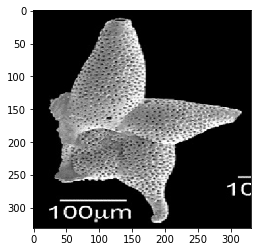

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235]
[  0   1   2   3   4   5   6   7   8   9 

In [5]:
# get the main training image data
train_images = np.array(train_imgs)
# For Dense layers
#train_images = train_images.reshape(len(train_images), img_width * img_height * img_chan)
# For CNN
train_images = train_images.reshape(len(train_images), img_width, img_height, img_chan)
train_images = train_images.astype('float32') / 255

# convert into categorical y label
train_labels = np.array(train_lbls)


print(train_images.shape)
print(train_labels.shape)

def categorical_to_cls(train_label):
    for ix,x in enumerate(train_label):
        if x != 0:
            break
    
    return(ix)

# Randomly select a training image and check the correctness of the genus class

ir = np.random.randint(0, train_labels.shape[0])

print(train_labels[ir])
cl = categorical_to_cls(train_labels[ir])
print(cl)
print(class_names[cl])
plt.imshow(train_images[ir])
plt.show()


'''
aug_images_a = np.array(aug_images)
aug_labels_a = np.array(aug_labels)
print(aug_images_a.shape)
print(aug_labels_a.shape)
'''

#idxx = np.arange(len(aug_images_a))
idxx = np.arange(len(train_images))
print(idxx)
#np.random.shuffle(idxx)
#print(idxx)

# Keep the main images as the test images
test_images = train_images
test_labels = train_labels

#train_images_interim = aug_images_a[idxx,]
#train_labels_interim = aug_labels_a[idxx,]

train_images_interim = train_images[idxx,]
train_labels_interim = train_labels[idxx,]

train_index = np.arange(len(train_images_interim))
print(train_index)

from sklearn.model_selection import train_test_split

# stratify based on the label so that training and validation data has equal proportion for each class
validation_split = 0.25
train_ids, validation_ids, train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_index,
    train_images_interim,
    train_labels_interim,
    test_size=validation_split,
    shuffle = True, # not needed, by default true
    #stratify=train_labels_interim, 
    random_state=2347) # keep the same random state so that we can compare different models

print(train_images.shape)
print(validation_images.shape)
print(train_labels.shape)
print(validation_labels.shape)

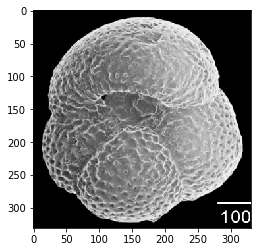

25
Morozovella


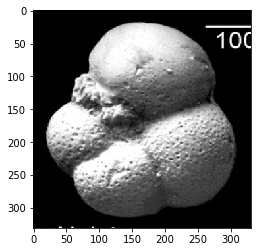

57
Microhedbergella
177

59

[ 1  1 20  1  2  4 10  4  1  1  1  1  2  1  2  2  3  2  4  8  1  6  6  4
 10  6  2  2  1  5  4  1  1  1  2  2  2  4  2  0  1  1  2  2  2  0  3  0
  1  1  1  1  1  1  1  2  1  0  3  0  1  3  1  1  2  0  0  1  0  2  0  1
  1  1  1  1  1  1  1  1]

[1 2 9 1 2 1 2 0 1 1 0 2 0 1 0 1 0 0 1 0 0 0 4 2 0 3 0 2 3 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 2 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 1]



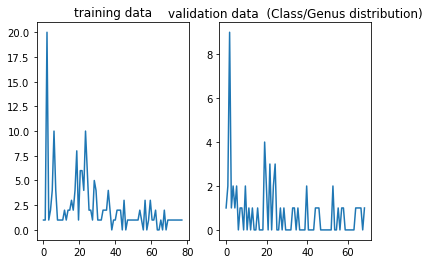

(177, 331, 331, 3)
(59, 331, 331, 3)
(236, 331, 331, 3)
(177, 79)
(59, 79)
(236, 79)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 329, 329, 32)      864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 329, 329, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 329, 329, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 164, 164, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 162, 162, 64)      18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 162, 162, 64)      256       
_________________________________________________________

In [6]:
train_img_random = np.random.randint(0,train_images.shape[0])

plt.imshow(train_images[train_img_random])
plt.show()
#print(train_labels[train_img_random])
cl = categorical_to_cls(train_labels[train_img_random])
print(cl)
print(class_names[cl])

validation_img_random = np.random.randint(0, validation_images.shape[0])

plt.imshow(validation_images[validation_img_random])
plt.show()
#print(validation_labels[validation_img_random])
cl = categorical_to_cls(validation_labels[validation_img_random])
print(cl)
print(class_names[cl])

# Check how good is the stratification (class distribution in training and validation data)

tl = []
tlc = []
for x in train_labels:
    cl = categorical_to_cls(x)
    tlc.append(cl)
    
vl = []
vlc = []
for x in validation_labels:
    cl = categorical_to_cls(x)
    vlc.append(cl)    
    
print(len(tlc))
#print(tlc)
print("")
print(len(vlc))
#print(vlc)
print("")

bin_num = 80
th, tbin = np.histogram(tlc, bins=bin_num)
print(th)
print("")
vh, vbin = np.histogram(vlc, bins=bin_num)
print(vh)
print("")

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(tbin[0:bin_num], th)
plt.title('training data')
plt.subplot(1, 2, 2)
plt.plot(vbin[0:bin_num], vh)
plt.title('validation data  (Class/Genus distribution)')
plt.show()
    

print(train_images.shape)
print(validation_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

from keras import layers
from keras import models
from time import strftime, gmtime

cur_time = strftime("%Y-%m-%d %H:%M:%S", gmtime())
model_name='simple_convnet' + str(cur_time)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), use_bias = False, activation='relu', input_shape=(img_width, img_height, img_chan)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), use_bias = False, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), use_bias = False, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten(input_shape = (img_width, img_height, img_chan)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# model.add(layers.Flatten())
model.add(layers.Dense(len(uniq_cls), activation='sigmoid'))


model.summary()

cur_time = strftime("%Y-%m-%d %H:%M:%S", gmtime())
model_name='vgg19_extended_sgd_momemtum_0.9_decay_0_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_' + str(cur_time)
#model_name = 'convbase_vgg19_adam_epoch_200_two_fc_4096' + str(cur_time)
print(model_name)

cur_time = strftime("%Y-%m-%d %H:%M:%S", gmtime())

# Use pretrained modela
# Model 1

#from keras.applications import VGG16
#conv_base_vgg16 = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(img_width, img_height, img_chan))

# Model 2

from keras.applications import VGG19
conv_base_vgg19 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_width, img_height, img_chan))

# Model 3

from keras.applications import ResNet50

#conv_base_resnet50 = ResNet50(weights='imagenet',
#                  include_top=False,
#                  input_shape=(img_width, img_height, img_chan))

# Model 4
#from keras.applications import InceptionV3

#conv_base_inceptionv3 = InceptionV3(weights='imagenet',
#                  include_top=False, 
#                  input_shape=(img_width, img_height, img_chan))

# Model 5
from keras.applications import InceptionResNetV2

#conv_base_inceptionresnetv2 = InceptionResNetV2(weights = 'imagenet',
#                                               include_top=False, 
#                                               input_shape=(img_width, img_height, img_chan))

# Model 6
#from keras.applications import NASNetLarge

#conv_base_nasnet = NASNetLarge(weights = 'imagenet', 
#                                   include_top = False,
#                                 input_shape=(img_width, img_height, img_chan))

conv_base = conv_base_vgg19
#conv_base = conv_base_inceptionresnetv2
conv_base.summary()


from keras import regularizers

model = models.Sequential()
conv_base.trainable = False
model.add(conv_base)
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(4096, activation='relu', name='fc1'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu', name='fc2'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(uniq_cls), activation='sigmoid', kernel_regularizer=regularizers.l2()))

#model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu')) #activity_regularizer=regularizers.l1(0.01)
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(len(uniq_cls), activation='sigmoid', kernel_regularizer=regularizers.l2(0.05)))
model_backup = model
model.summary()

In [7]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.utils import get_file
from keras import backend as K
import h5py

def VGG19_convolutions(input_shape = (331, 331, 3),
                       pooling=None,
                       classes=1000):

    model = Sequential()
    
    # Block 1
    model.add(Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1', 
                      input_shape=input_shape))
   
    model.add(Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2'))
    
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
    
    # Block 2
    model.add(Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1'))
    model.add(Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1'))
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2'))
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3'))
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    if pooling == 'avg':
        model.add(GlobalAveragePooling2D())
    elif pooling == 'max':
        model.add(GlobalMaxPooling2D())
    
    return model

VGG19_WEIGHTS_PATH_NO_TOP = ('http://github.com/fchollet/deep-learning-models/'
                             'releases/download/v0.1/'
                             'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

weights_path = get_file(
                    'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    VGG19_WEIGHTS_PATH_NO_TOP,
                    cache_subdir='models',
                    file_hash='6d6bbae143d832006294945121d1f1fc')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
80142336/80134624 [==============================] - 1s 0us/step


In [8]:
model = VGG19_convolutions()

model.load_weights(weights_path)
       
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(uniq_cls), activation='sigmoid', kernel_regularizer=regularizers.l2()))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 331, 331, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 331, 331, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 165, 165, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 165, 165, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 165, 165, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 82, 82, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 82, 82, 256)       295168    
__________

In [20]:
models_dir='/home/azehady/projects/automatic_fossil_image_detection/models'

save_period=1
schedule = None

In [21]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, TensorBoard
from time import strftime, gmtime

cur_time = strftime("%Y-%m-%d %H:%M:%S", gmtime()) 
best_model_file = '{}/best_{}_{}.h5'.format(models_dir, model_name,cur_time)
print(best_model_file)

class ModelCheckpointMGPU(ModelCheckpoint):
    def __init__(self, original_model, filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1):
        self.original_model = original_model
        super().__init__(filepath, monitor, verbose, save_best_only, save_weights_only, mode, period)

    def on_epoch_end(self, epoch, logs=None):
        self.model = self.original_model
        super().on_epoch_end(epoch, logs)

def freeze_model(model, freeze_before_layer):
    if freeze_before_layer == "ALL":
        for l in model.layers:
            l.trainable = False
    else:
        freeze_before_layer_index = -1
        for i, l in enumerate(model.layers):
            if l.name == freeze_before_layer:
                freeze_before_layer_index = i
        for l in model.layers[:freeze_before_layer_index + 1]:
            l.trainable = False


best_model = ModelCheckpointMGPU(model, filepath=best_model_file, monitor='val_loss',
                                     verbose=1,
                                     mode='min',
                                     period=save_period,
                                     save_best_only=True,
                                     save_weights_only=True)
last_model_file = '{}/last_{}_{}.h5'.format(models_dir, model_name,cur_time)
print(last_model_file)

last_model = ModelCheckpointMGPU(model, filepath=last_model_file, monitor='val_loss',
                                     verbose=1,
                                     mode='min',
                                     period=save_period,
                                     save_best_only=False,
                                     save_weights_only=True)

callbacks = []
callbacks.append(best_model)
callbacks.append(last_model)

tb = TensorBoard("./logs/{}".format(model_name))
callbacks.append(tb)

/home/azehady/projects/automatic_fossil_image_detection/models/best_vgg19_extended_sgd_momemtum_0.9_decay_0_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2020-02-01 04:29:36_2020-02-01 04:32:07.h5
/home/azehady/projects/automatic_fossil_image_detection/models/last_vgg19_extended_sgd_momemtum_0.9_decay_0_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2020-02-01 04:29:36_2020-02-01 04:32:07.h5


In [22]:
from keras.optimizers import Adam, RMSprop,SGD

opt_pref = 'adam2'
learning_rate = 0.01
momentum=0.9
decay = 0

if opt_pref == 'adam':
    optimizer = 'adam'
elif opt_pref == 'adam2':
    #optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay, amsgrad=False)
    optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-10, decay=decay, amsgrad=False)
elif opt_pref == 'amsgrad':
    optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay, amsgrad=True)
elif opt_pref == 'rmsprop':
    optimizer = RMSprop(lr=learning_rate, decay = decay)
elif opt_pref == 'adamax':
    optimizer = AdaMax(lr=learning_rate, decay = decay)
elif opt_pref == 'sgd':
    optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum) #, nesterov=True)

In [38]:
epoch = 100
batch_size = 10

In [39]:
def schedule_steps(epoch, steps):
    for step in steps:
        if step[1] > epoch:
            print("Setting learning rate to {}".format(step[0]))
            return step[0]
        print("Setting learning rate to {}".format(steps[-1][0]))
        return steps[-1][0]

In [40]:
steps = [(1e-6, 2), (1e-5, 10), (5e-6, 20), (3e-6, 25)]
schedule_steps(epoch,steps)

Setting learning rate to 3e-06


3e-06

In [41]:
if steps is not None:
    lrSchedule = LearningRateScheduler(lambda epoch: schedule_steps(epoch, steps))
    callbacks.insert(0, lrSchedule)

# callbacks.append(lrSchedule)

In [42]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=10, min_lr=0.0000001)
callbacks.append(reduce_lr)

In [43]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
print(batch_size)

10


In [46]:
history = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=epoch, batch_size=batch_size, callbacks=callbacks, verbose=1)
#history = model.fit(train_images, train_labels, validation_split=0.30, ebpochs=epoch, batch_size=batch_size, callbacks=callbacks, verbose=1)b

Train on 177 samples, validate on 59 samples
Epoch 1/100
Setting learning rate to 1e-06
Setting learning rate to 1e-06
Setting learning rate to 1e-06


ResourceExhaustedError: OOM when allocating tensor with shape[51200,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_3/Adam/mul_163}} = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Adam_1/beta_2/read, training_3/Adam/Variable_74/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_3/add/_2015}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3056_loss_3/add", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
model_dir='/home/azehady/projects/automatic_fossil_image_detection'

In [18]:
#best_model_file = './models/' + 'best_vgg19_extended_adam_epoch_200_two_fc_40962019-03-21 22:03:02_2019-03-21 22:04:46.h5'
#last_model_file = './models/' + 'last_vgg19_extended_adam_epoch_200_two_fc_40962019-03-21 22:03:02_2019-03-21 22:04:46.h5'

#best_model_file = './models/' + 'best_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2019-03-28 13:14:53_2019-03-28 13:15:37.h5'
#last_model_file = './models/' + 'last_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2019-03-28 13:14:53_2019-03-28 13:15:37.h5'

#best_model_file = './models/best_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2019-03-28 13:14:53_2019-03-28 13:15:37.h5'
#last_model_file = './models/last_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_no_reduce_lr_callback_time_2019-03-28 13:14:53_2019-03-28 13:15:37.h5'

best_model_file = model_dir + '/models/best_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_time_2019-03-27 23:54:18_2019-03-27 23:54:44.h5'
last_model_file = model_dir + '/models/last_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_time_2019-03-27 23:54:18_2019-03-27 23:54:44.h5'

In [19]:
# last model
# last_convbase_vgg19_img_dim_331_kernel_regularizer2018-10-28 02:20:00_2018-10-28 03:53:16.h5
model.load_weights(last_model_file)
res_last = model.evaluate(test_images, test_labels)
print(res_last)

# best model
# ./models/

OSError: Unable to open file (unable to open file: name = './models/last_vgg19_extended_adam_epoch_200_two_fc_4096_lr_0.01_time_2019-03-27 23:54:18_2019-03-27 23:54:44.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)